In [94]:
import pandas as pd
import numpy as np
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import *
wordnet = WordNetLemmatizer()
snowballstemmer = SnowballStemmer("english")
stopwords = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/wangjiayun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/wangjiayun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/wangjiayun/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [100]:
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [67]:
biden = pd.read_csv("Biden_Tweets.csv")
biden = biden.dropna(subset=["Text"]).reset_index()

In [69]:
#biden

In [70]:
from unidecode import unidecode
from re import sub

def text_to_word_list(text, remove_polish_letters):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = remove_polish_letters(text)
    text = str(text)
    text = text.lower()
    
    if 'pic.twitter' in text:
        text = 'empty'

    # Clean the text
    text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    text = sub(r"\+", " plus ", text)
    text = sub(r",", " ", text)
    text = sub(r"\.", " ", text)
    text = sub(r"!", " ", text)
    text = sub(r"\?", " ", text)
    text = sub(r"'", " ", text)
    text = sub(r":", " ", text)
    text = sub(r"\s{2,}", " ", text)
    text = sub(r'http\S+', '', text)

    text = text.split()
    text = list(filter(lambda x: len(x) > 1, text))

    return text  

In [71]:
biden["Cleaned_Text"] = biden["Text"].apply(lambda x: text_to_word_list(x, unidecode))

In [72]:
def empty(text):
    is_empty = False
    if text == ['empty']:
        is_empty = True
    return is_empty

def filter_df(df):
    df["is_empty"] = df["Cleaned_Text"].apply(lambda x: empty(x))
    df_filtered = df[df["is_empty"] == False]
    final_df = df_filtered.drop(["is_empty"], axis = 1)
    return final_df

biden = filter_df(biden).reset_index(drop=True)

In [73]:
biden.head()

index                       timestamp            Username  Retweets  \
0      0  Thu Apr 25 16:59:59 +0000 2019  980275870655893504         0   
1      2  Thu Apr 25 16:59:58 +0000 2019  827325184432603136         0   
2      3  Thu Apr 25 16:59:57 +0000 2019  753734119893393408         0   
3      4  Thu Apr 25 16:59:57 +0000 2019           140074335         0   
4      5  Thu Apr 25 16:59:57 +0000 2019          2373123864         0   

                                                Text Mentions Hashtags  \
0             And, we have President Trump to thank.      NaN      NaN   
1  The “hang em high” references were less than s...      NaN      NaN   
2  Donald Trump Makes Joe Biden’s Point, Mocking ...      NaN      NaN   
3  Factually speaking, that’s not accurate. Trump...      NaN      NaN   
4                                         HAAAAAA!!!      NaN      NaN   

                                        Cleaned_Text  
0       [and, we, have, president, trump, to, thank]  
1  [the, hang, em, high, references, were, less, ...  
2  [donald, trump, makes, joe, biden, point, mock...  
3  [factually, speaking, that, not, accurate, tru...  
4                                          [haaaaaa]

In [74]:
sentences = biden["Cleaned_Text"].apply(lambda x: " ".join(x))
#sentences

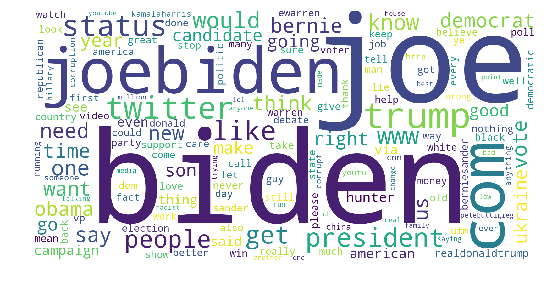

In [75]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
                          collocations = False,
                          width=1600, height=800,
                          background_color='white',
                          stopwords=stopwords,
                          max_words=150,
                          #max_font_size=40, 
                          random_state=42
                         ).generate(' '.join(sentences)) # can't pass a series, needs to be strings and function computes frequencies
print(wordcloud)
plt.figure(figsize=(9,8))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [76]:
tokenized_tweet = biden["Cleaned_Text"]
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0            [and, we, have, presid, trump, to, thank]
1    [the, hang, em, high, refer, were, less, than,...
2    [donald, trump, make, joe, biden, point, mock,...
3    [factual, speak, that, not, accur, trump, ha, ...
4                                            [haaaaaa]
Name: Cleaned_Text, dtype: object

In [77]:
tokenized_tweet = tokenized_tweet.reset_index(drop=True)
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

biden['Cleaned_Text'] = tokenized_tweet

In [79]:
biden["Cleaned_Text"].head()

0                    and we have presid trump to thank
1          the hang em high refer were less than subtl
2    donald trump make joe biden point mock candid ...
3    factual speak that not accur trump ha been acc...
4                                              haaaaaa
Name: Cleaned_Text, dtype: object

In [82]:
biden.drop_duplicates(subset=['Cleaned_Text'], keep = 'first',inplace= True)

In [85]:
biden.reset_index(drop=True,inplace=True)

In [92]:
from textblob import TextBlob

def calculate_sentiment(Clean_text):
    return TextBlob(Clean_text).sentiment

def calculate_sentiment_analyser(Clean_text):    
    return analyser.polarity_scores(Clean_text)

In [98]:
#biden['sentiment']=biden.Cleaned_Text.apply(calculate_sentiment)
#biden['sentiment_analyser']=biden.Cleaned_Text.apply(calculate_sentiment_analyser)


s = pd.DataFrame(index = range(0,len(biden)),columns= ['compound_score','compound_score_sentiment'])

for i in range(0,len(biden)): 
    s['compound_score'][i] = biden['sentiment_analyser'][i]['compound']
  
    if (biden['sentiment_analyser'][i]['compound'] <= -0.05):
        s['compound_score_sentiment'][i] = 'Negative'    
    if (biden['sentiment_analyser'][i]['compound'] >= 0.05):
        s['compound_score_sentiment'][i] = 'Positive'
    if ((biden['sentiment_analyser'][i]['compound'] >= -0.05) & (biden['sentiment_analyser'][i]['compound'] <= 0.05)):
        s['compound_score_sentiment'][i] = 'Neutral'
    
biden['compound_score'] = s['compound_score']
biden['compound_score_sentiment'] = s['compound_score_sentiment']
biden.head()

index                       timestamp            Username  Retweets  \
0      0  Thu Apr 25 16:59:59 +0000 2019  980275870655893504         0   
1      2  Thu Apr 25 16:59:58 +0000 2019  827325184432603136         0   
2      3  Thu Apr 25 16:59:57 +0000 2019  753734119893393408         0   
3      4  Thu Apr 25 16:59:57 +0000 2019           140074335         0   
4      5  Thu Apr 25 16:59:57 +0000 2019          2373123864         0   

                                                Text Mentions Hashtags  \
0             And, we have President Trump to thank.      NaN      NaN   
1  The “hang em high” references were less than s...      NaN      NaN   
2  Donald Trump Makes Joe Biden’s Point, Mocking ...      NaN      NaN   
3  Factually speaking, that’s not accurate. Trump...      NaN      NaN   
4                                         HAAAAAA!!!      NaN      NaN   

                                        Cleaned_Text  \
0                  and we have presid trump to thank   
1        the hang em high refer were less than subtl   
2  donald trump make joe biden point mock candid ...   
3  factual speak that not accur trump ha been acc...   
4                                            haaaaaa   

                                     sentiment  \
0                                   (0.0, 0.0)   
1  (-0.003333333333333327, 0.3033333333333333)   
2   (-0.05714285714285716, 0.8285714285714285)   
3                    (0.4, 0.8750000000000001)   
4                                   (0.0, 0.0)   

                                  sentiment_analyser compound_score  \
0  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...         0.3612   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...              0   
2  {'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compou...        -0.7269   
3  {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...        -0.8742   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...              0   

  compound_score_sentiment  
0                 Positive  
1                  Neutral  
2                 Negative  
3                 Negative  
4                  Neutral

In [97]:
biden.head()

index                       timestamp            Username  Retweets  \
0      0  Thu Apr 25 16:59:59 +0000 2019  980275870655893504         0   
1      2  Thu Apr 25 16:59:58 +0000 2019  827325184432603136         0   
2      3  Thu Apr 25 16:59:57 +0000 2019  753734119893393408         0   
3      4  Thu Apr 25 16:59:57 +0000 2019           140074335         0   
4      5  Thu Apr 25 16:59:57 +0000 2019          2373123864         0   

                                                Text Mentions Hashtags  \
0             And, we have President Trump to thank.      NaN      NaN   
1  The “hang em high” references were less than s...      NaN      NaN   
2  Donald Trump Makes Joe Biden’s Point, Mocking ...      NaN      NaN   
3  Factually speaking, that’s not accurate. Trump...      NaN      NaN   
4                                         HAAAAAA!!!      NaN      NaN   

                                        Cleaned_Text  \
0                  and we have presid trump to thank   
1        the hang em high refer were less than subtl   
2  donald trump make joe biden point mock candid ...   
3  factual speak that not accur trump ha been acc...   
4                                            haaaaaa   

                                     sentiment  \
0                                   (0.0, 0.0)   
1  (-0.003333333333333327, 0.3033333333333333)   
2   (-0.05714285714285716, 0.8285714285714285)   
3                    (0.4, 0.8750000000000001)   
4                                   (0.0, 0.0)   

                                  sentiment_analyser  
0  {'neg': 0.0, 'neu': 0.706, 'pos': 0.294, 'comp...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.21, 'neu': 0.79, 'pos': 0.0, 'compou...  
3  {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...  
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...

In [99]:
biden.compound_score_sentiment.value_counts()

Positive    16361
Neutral     14579
Negative    13967
Name: compound_score_sentiment, dtype: int64

In [ ]:
#tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
# Considering 3 grams and mimnimum frq as 0
tf_idf_vect = CountVectorizer(analyzer='word',ngram_range=(1,1),stop_words='english', min_df = 0.0001)
tf_idf_vect.fit(df['Clean_text'])
desc_matrix = tf_idf_vect.transform(df["Clean_text"])

In [130]:
def tokenization_and_stem(tokens):
    
    token_ls = []
    snowballstemmer_token_ls = []
    wordNet_token_ls = []
    for token in tokens:
        if token not in stopwords:
            token_ls.append(token)
            snowballstemmer_token_ls.append(snowballstemmer.stem(token))
            wordNet_token_ls.append(wordnet.lemmatize(token))
    
    return token_ls, snowballstemmer_token_ls, wordNet_token_ls


df_tweet = [0]*len(biden["Text"])
token_ls = [0]*len(biden["Text"])
snowstemmer_token_ls = [0]*len(biden["Text"])
wordNet_token_ls = [0]*len(biden["Text"])

for num, text in enumerate(biden["Cleaned_Text"]):
    token_ls[num], snowstemmer_token_ls[num] , wordNet_token_ls[num] = tokenization_and_stem(text)

In [132]:
snowstemmer_token_ls

[['presid', 'trump', 'thank'],
 ['pic', 'twitter', 'com/pxypfuzzdb'],
 ['hang', 'em', 'high', 'refer', 'less', 'subtl'],
 ['donald',
  'trump',
  'make',
  'joe',
  'biden',
  'point',
  'mock',
  'candid',
  'intellig',
  'dem',
  'sick',
  'de',
  '//www',
  'yahoo',
  'com/entertainment/donald',
  'trump',
  'make',
  'joe',
  'biden',
  '130340726',
  'html',
  'tsrc',
  'fauxdal'],
 ['factual',
  'speak',
  'accur',
  'trump',
  'accus',
  'near',
  'two',
  'dozen',
  'incid',
  'sexual',
  'misconduct',
  'includ',
  'rape',
  'one',
  'accus',
  'biden',
  'anyth',
  'sexual',
  'far',
  '//www',
  'businessinsid',
  'com/women',
  'accus',
  'trump',
  'sexual',
  'misconduct',
  'list',
  '2017',
  '12'],
 ['haaaaaa'],
 ['ask',
  'joe',
  'biden',
  'intellig',
  'presid',
  'sit',
  'white',
  'hous',
  'stupid',
  'grin',
  'face',
  'trump',
  'intellig',
  'presid',
  'yet'],
 ['us', 'peopl', 'elect', 'trump'],
 ['donald',
  'trump',
  'jr',
  'win',
  'internet',
  'thum

In [139]:
def back_to_clean_sent(token_ls):
    """
    In order to perform sentiment analysis,
    here we put the words back into sentences. 
    """
    
    clean_sent_ls = []
    for word_ls in token_ls:
        clean_sent = ""
        for word in word_ls:
            clean_sent += (word + " ")
        clean_sent_ls.append(clean_sent)
    return clean_sent_ls


sentence_tokenized = back_to_clean_sent(token_ls)
    
sentence_snowstemmeed = back_to_clean_sent(snowstemmer_token_ls)
    
sentence_wordnetstemmeed = back_to_clean_sent(wordNet_token_ls)


In [140]:
def sentiment_analysis(insert_processed_sentence):
    """
    Do the sentiment analysis!!
    """
    sentiment = [0]*len(biden["Text"])
    for num, player_sent in enumerate(insert_processed_sentence):
        ll = []
        for sentence in player_sent:
            ss = sid.polarity_scores(sentence)
            ll.append(ss)
        sentiment[num] = ll
    return sentiment


sentiment_original = sentiment_analysis(biden["Text"])
sentiment_token = sentiment_analysis(sentence_tokenized)
sentiment_snowstemmed = sentiment_analysis(sentence_snowstemmeed)

In [141]:
sentiment_token

[[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
  {'neg': 0.0, 'neu': 1.0, 'pos

In [ ]:
# Sentiment Analysis and create dataframe
new_df = pd.DataFrame()
i = 0
for senti_token, snow_stem in zip(sentiment_token, sentiment_snowstemmed):
    #senti_token_pos = [], senti_token_neu = [], senti_token_neg = []
    senti_token_compound = []
    senti_stem_compound = []
    sentiment_result_token = []
    sentiment_result_stem = []

    for s1 in senti_token:
        senti_token_compound.append(s1["compound"])
        if s1["compound"] >= 0.05:
            sentiment_result_token.append("positive")
        elif s1["compound"] <= -0.05:
            sentiment_result_token.append("negative")
        else:
            sentiment_result_token.append("neutral")
            
    for s2 in snow_stem:
        senti_stem_compound.append(s2["compound"])
        if s2["compound"] >= 0.05:
            sentiment_result_stem.append("positive")
        elif s2["compound"] <= -0.05:
            sentiment_result_stem.append("negative")
        else:
            sentiment_result_stem.append("neutral")
        
    tw_df = pd.DataFrame.from_dict({"Tweets":df["Tweets"][i],
                                "Create_time":df["Create_time"][i],
                                "Name":df["Name"][i],
                                "sentiment_token_compound":senti_token_compound,
                                "sentiment_result_token" :sentiment_result_token, 
                                "sentiment_stem_compound":senti_stem_compound,
                                "sentiment_result_stem":sentiment_result_stem})
    new_df = new_df.append(tw_df)
    i += 1
    

In [142]:
Tweets_mix = []
for i, row in enumerate(sentence_snowstemmeed):
    all_row = ""
    for sent in row:
        all_row += sent
    Tweets_mix.append(all_row)

In [17]:
Tweets_mix

['presid trump thank ',
 'pic twitter com/pxypfuzzdb ',
 'hang em high refer less subtl ',
 'donald trump make joe biden point mock candid intellig dem sick de //www yahoo com/entertainment/donald trump make joe biden 130340726 html tsrc fauxdal ',
 'factual speak accur trump accus near two dozen incid sexual misconduct includ rape one accus biden anyth sexual far //www businessinsid com/women accus trump sexual misconduct list 2017 12 ',
 'haaaaaa ',
 'ask joe biden intellig presid sit white hous stupid grin face trump intellig presid yet ',
 'us peopl elect trump ',
 'donald trump jr win internet thump creepi uncl joe biden big michael avenatti endors //www thegatewaypundit com/2019/04/donald trump jr win internet thump creepi uncl joe biden big michael avenatti endorsement/ via gatewaypundit ',
 'time run joe ',
 'care ',
 'tri get rid establish ruler ',
 'know biden knew was/i shame parent put pedo creep place offic would place dirti hand child real quick like camera camera ',
 '27

In [143]:
# create the TF-IDF matrix and model first
tfidf_model = TfidfVectorizer(max_df=0.8, max_features=2000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=None, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(Tweets_mix) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " players and " + str(tfidf_matrix.shape[1]) + " terms.")

In total, there are 52404 players and 3 terms.


In [23]:
from sklearn.cluster import KMeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# create DataFrame films from all of the input files.
films = {'Name': biden["Username"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(films, index = [clusters])


l1, l2 = "", ""
for player in sentence_tokenized:
    for sent in player:
        l1 += sent
docs_tokenized = l1.split()

for player in sentence_snowstemmeed:
    for sent in player:
        l2 += sent
docs_snowstemmed = l2.split()

vocab_frame_dict = {docs_snowstemmed[x]:docs_tokenized[x] for x in range(len(docs_snowstemmed))}
tf_selected_words = tfidf_model.get_feature_names()

print ("Clustering result by K-means")
# km.cluster_centers_ denotes the importances of each items in centroid.
# We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words: ", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :3]: #replace 5 with n words per cluster
        Cluster_keywords_summary[i].append(vocab_frame_dict[tf_selected_words[ind]])
        print (vocab_frame_dict[tf_selected_words[ind]] + ",", end='')

    #cluster_NBA = frame.loc[i]['Name'].values
    #print("\n", ", ".join(cluster_NBA), "\n")

Clustering result by K-means
Cluster 0 words: joe,com,biden,Cluster 1 words: com,biden,joe,Cluster 2 words: biden,joe,com,

In [24]:
Cluster_keywords_summary

{0: ['joe', 'com', 'biden'],
 1: ['com', 'biden', 'joe'],
 2: ['biden', 'joe', 'com']}

In [148]:
frame.rename(columns = {"Name": "Username"}).merge(biden)

Username  Cluster  index                       timestamp  \
0        980275870655893504        0      0  Thu Apr 25 16:59:59 +0000 2019   
1                 102468365        1      1  Thu Apr 25 16:59:59 +0000 2019   
2        827325184432603136        0      2  Thu Apr 25 16:59:58 +0000 2019   
3        753734119893393408        2      3  Thu Apr 25 16:59:57 +0000 2019   
4                 140074335        1      4  Thu Apr 25 16:59:57 +0000 2019   
5                2373123864        0      5  Thu Apr 25 16:59:57 +0000 2019   
6                 493358463        2      6  Thu Apr 25 16:59:57 +0000 2019   
7                  32987649        0      7  Thu Apr 25 16:59:57 +0000 2019   
8                 221011668        2      8  Thu Apr 25 16:59:57 +0000 2019   
9                2269936974        2      9  Thu Apr 25 16:59:55 +0000 2019   
10                223526305        0     10  Thu Apr 25 16:59:54 +0000 2019   
11                235090920        0     11  Thu Apr 25 16:59:54 +0000 2019   
12                 21733067        2     12  Thu Apr 25 16:59:52 +0000 2019   
13                564241606        1     13  Thu Apr 25 16:59:50 +0000 2019   
14                 14299926        0     15  Thu Apr 25 16:59:50 +0000 2019   
15                 14845337        0     16  Thu Apr 25 16:59:50 +0000 2019   
16                 58005882        2     17  Thu Apr 25 16:59:50 +0000 2019   
17               2305740907        0     18  Thu Apr 25 16:59:50 +0000 2019   
18               2180056032        1     19  Thu Apr 25 16:59:49 +0000 2019   
19       799334252831801344        0     20  Thu Apr 25 16:59:49 +0000 2019   
20                466953226        2     21  Thu Apr 25 16:59:48 +0000 2019   
21                466953226        2   7051  Tue Jun 11 16:59:59 +0000 2019   
22                466953226        2     21  Thu Apr 25 16:59:48 +0000 2019   
23                466953226        2   7051  Tue Jun 11 16:59:59 +0000 2019   
24                 70751132        2     22  Thu Apr 25 16:59:48 +0000 2019   
25                 15986096        2     23  Thu Apr 25 16:59:48 +0000 2019   
26                183554696        1     24  Thu Apr 25 16:59:48 +0000 2019   
27       958672653493194752        0     25  Thu Apr 25 16:59:47 +0000 2019   
28       958672653493194752        0    937  Wed May 01 16:59:09 +0000 2019   
29       958672653493194752        0   1019  Wed May 01 16:56:42 +0000 2019   
...                     ...      ...    ...                             ...   
121258            237130212        0  52761  Sat Apr 11 11:49:53 +0000 2020   
121259   993870104373989377        1  52763  Sat Apr 11 11:49:51 +0000 2020   
121260           2772593255        0  52764  Sat Apr 11 11:49:50 +0000 2020   
121261  1025413008930025472        0  52766  Sat Apr 11 11:49:48 +0000 2020   
121262             27580422        2  52767  Sat Apr 11 11:49:48 +0000 2020   
121263             75423648        1  52768  Sat Apr 11 11:49:47 +0000 2020   
121264   952334937310494728        0  52769  Sat Apr 11 11:49:45 +0000 2020   
121265   824668403436773376        0  52771  Sat Apr 11 11:49:45 +0000 2020   
121266            145393538        2  52772  Sat Apr 11 11:49:44 +0000 2020   
121267           3318038060        0  52773  Sat Apr 11 11:49:44 +0000 2020   
121268             15956640        0  52774  Sat Apr 11 11:49:44 +0000 2020   
121269             17888709        2  52775  Sat Apr 11 11:49:44 +0000 2020   
121270           2788196223        2  52776  Sat Apr 11 11:49:44 +0000 2020   
121271   966716807452258304        0  52777  Sat Apr 11 11:49:44 +0000 2020   
121272             64425008        2  52778  Sat Apr 11 11:49:43 +0000 2020   
121273  1242409082037944320        0  52780  Sat Apr 11 11:49:43 +0000 2020   
121274  1248738978200772608        0  52781  Sat Apr 11 11:49:43 +0000 2020   
121275   835888975487385600        0  52782  Sat Apr 11 11:49:42 +0000 2020   
121276   947508088306675712        0  52783  Sat Apr 11 11:49:42 +000